In [1]:
"""
Created on Thu Jul  4 12:00:18 2019
@author: DataLoungeUser
"""
import numpy as np
import pandas as pd
import seaborn as sns
#import plotly
#%matplotlib inline
#import plotly.plotly as py
import matplotlib.pyplot as plt
from matplotlib import style

from sklearn.model_selection import train_test_split

In [2]:
style.use('fivethirtyeight')
df1 = pd.read_csv("hour.csv")
print (df1.head())
df = df1.drop(['dteday'], axis=1)
print (df.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  
   instant  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0        1       1   

In [3]:
df.info()

df.head()

df.shape
df_A,df_test = train_test_split(df, test_size=0.20, random_state=42)
df_train,df_val = train_test_split(df_A, test_size=0.20, random_state=42)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
instant       17379 non-null int64
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12)
memory usage: 2.1 MB


In [4]:
def plotFeatures(col_list,title):
    plt.figure(figsize=(10, 14))
    i = 0
    print(len(col_list))
    for col in col_list:
        i+=1
        plt.subplot(8,2,i)
        plt.plot(df[col],df["cnt"],marker='.',linestyle='none')
        plt.title(title % (col))   
        plt.tight_layout()

16


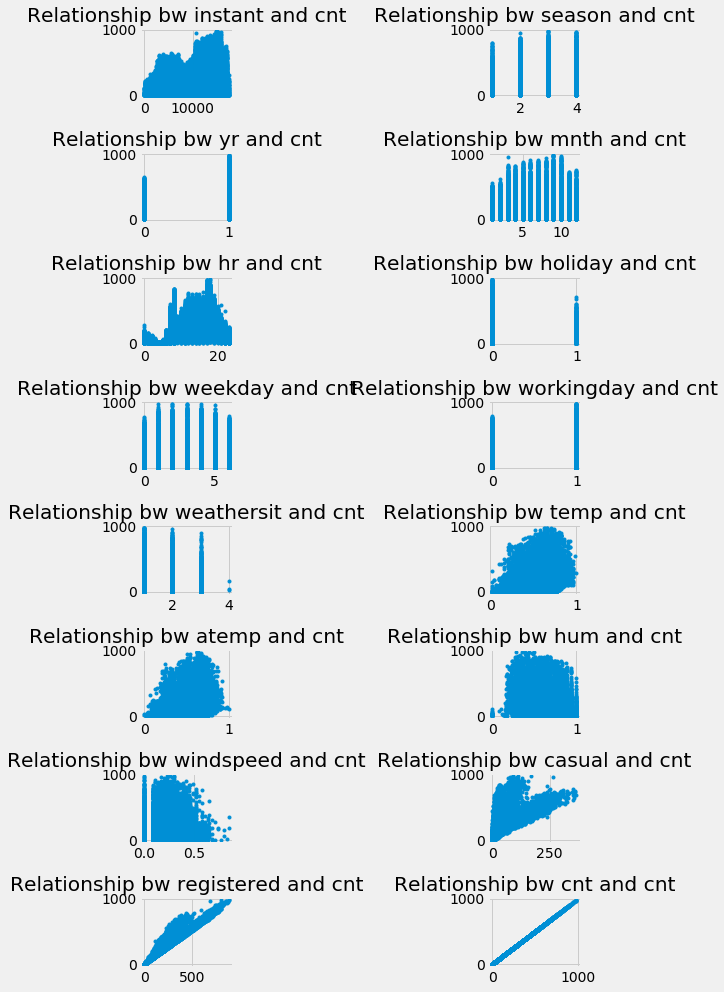

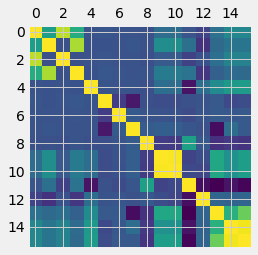

In [5]:

#colnames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'registered', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

colnames = df.columns

plotFeatures(colnames,"Relationship bw %s and cnt")


plt.matshow(df.corr())

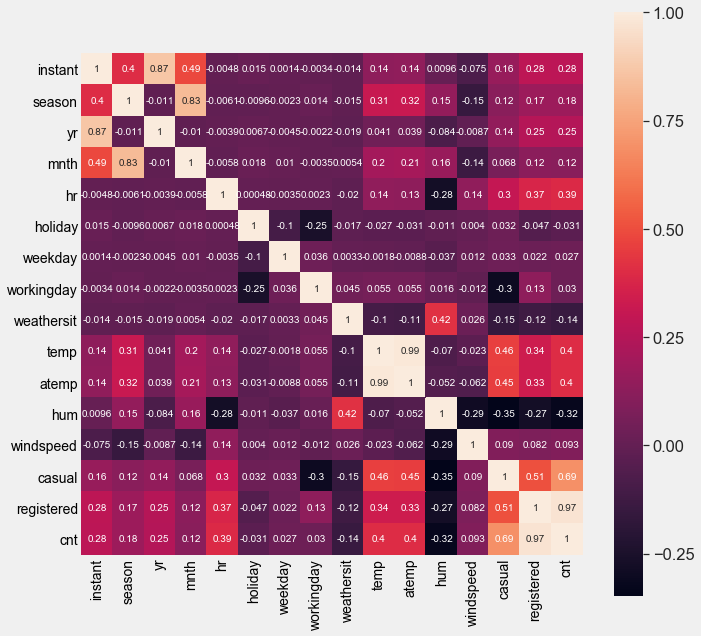

In [6]:

fig = plt.subplots(figsize = (10,10))
sns.set(font_scale=1.5)
sns.heatmap(df.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
plt.show()



In [7]:

def predictPrice(x,theta):
    return np.dot(x,theta)




In [8]:
def calculateCost(x,theta,Y):
    prediction = predictPrice(x,theta)
    return ((prediction - Y)**2).mean()/2

In [ ]:
def abline(x,theta,Y):
    """Plot a line from slope and intercept"""
    
    y_vals = predictPrice(x,theta)
#    plt.xlim(-20, 20)
#    plt.ylim(-10, 60)
    plt.xlabel('No. of Rooms in the house')
    plt.ylabel('Price of house')
    plt.gca().set_aspect(0.1, adjustable='datalim')
    plt.plot(x[:,-1],Y,'.',x[:,-1], y_vals, '-.')
    plt.gca().legend(('Data','Regressor'))
    plt.show()
     
    

In [ ]:
def loss_plot(x,costs_train,costs_val):
    '''plot the loss informination'''
    plt.xlabel('No. of iteration')
    plt.ylabel('Loss')
    plt.plot(x,costs_train,'.',x, costs_val, '-.')
    plt.gca().legend(('Train','Val'))
    plt.show()

In [ ]:
def gradientDescentLinearRegression(alpha=0.01,iter=20000,theta=[]):
    '''initialized the values'''
    prev_val = 1
    counter =0
    if any(theta):
        theta = theta
    else :
        theta = np.zeros(2)
#    else:
#        theta = np.zeros(2)
        
    theta0 = []
    theta1 = []
        
    costs_train = []
    costs_val = []
    
    '''provide the training informination'''
    predictor = df_train["registered"]
    x_train = np.column_stack((np.ones(len(predictor)),predictor))
    Y_train = df_train["cnt"]
    
    
    
    '''provide the validation informination'''
    predictor_val = df_val["registered"]
    x_val = np.column_stack((np.ones(len(predictor_val)),predictor_val))
    Y_val = df_val["cnt"]
     
    '''Do for number of iter'''
    for i in range(iter):
        '''do the prediction'''
        pred = predictPrice(x_train,theta)
        '''' correct the gradient '''
        t0 = theta[0] - alpha *(pred - Y_train).mean()
        t1 = theta[1] - alpha *((pred - Y_train)* x_train[:,1]).mean()
        theta = np.array([t0,t1])
        
        ''' training loss '''
        J_train = calculateCost(x_train,theta,Y_train)
        theta0.append(t0)
        theta1.append(t1)
        costs_train.append(J_train)
        '''validation loss'''
        J_val = calculateCost(x_val,theta,Y_val)
        costs_val.append(J_val)
        if i%10==0:
            print(f"Iteration: {i+1},Cost = {J_train},theta = {theta}")
            
            print(f"Iteration: {i+1},Cost_val = {J_val},theta = {theta}")
            
            abline(x_train,theta,Y_train)
        if J_val>prev_val:
            counter +=1   #counter = counter + 1
            prev_val = J_val
        else:
            counter = 0
            prev_val = J_val
            
        '''check the teregisteredination condition''' 
        if counter>10:
            print ("teregisteredinated")
            print(f'theta0 = {len(theta0)}\ntheta1 = {len(theta1)}\nCosts = {len(costs_train)}')
            print ( J_val,prev_val,counter,i)
            return costs_val,costs_train,theta,i+1
        
#            abline(x_train,theta,Y_train)
    print(f'theta0 = {len(theta0)}\ntheta1 = {len(theta1)}\nCosts = {len(costs_train)}')
    return costs_val,costs_train,theta,iter

Iteration: 1,Cost = 31665.033643392395,theta = [0.00019026 0.05644416]
Iteration: 1,Cost_val = 31605.202820152874,theta = [0.00019026 0.05644416]


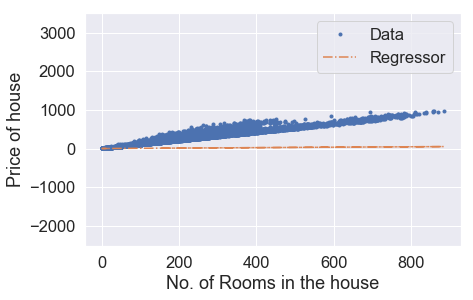

Iteration: 11,Cost = 12652.796170172403,theta = [0.00167533 0.49353986]
Iteration: 11,Cost_val = 12677.482808797164,theta = [0.00167533 0.49353986]


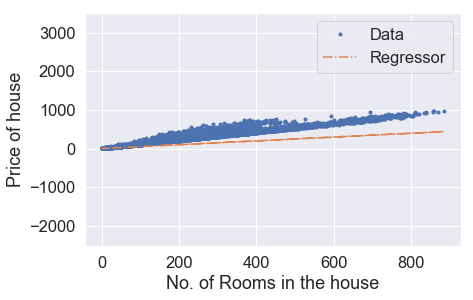

Iteration: 21,Cost = 5406.449308032753,theta = [0.00261198 0.76338796]
Iteration: 21,Cost_val = 5446.1850663885425,theta = [0.00261198 0.76338796]


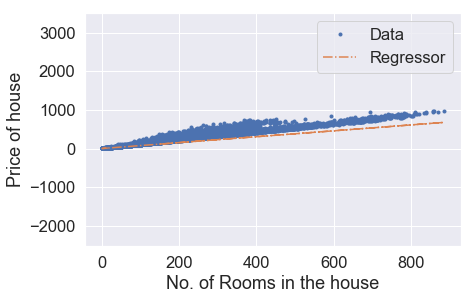

Iteration: 31,Cost = 2644.567921110174,theta = [0.00321007 0.92998303]
Iteration: 31,Cost_val = 2679.4430726461064,theta = [0.00321007 0.92998303]


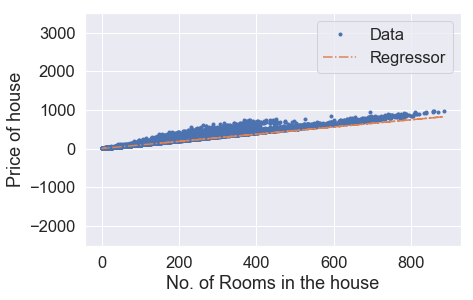

Iteration: 41,Cost = 1591.901013836467,theta = [0.00359913 1.03283315]
Iteration: 41,Cost_val = 1618.3817044880955,theta = [0.00359913 1.03283315]


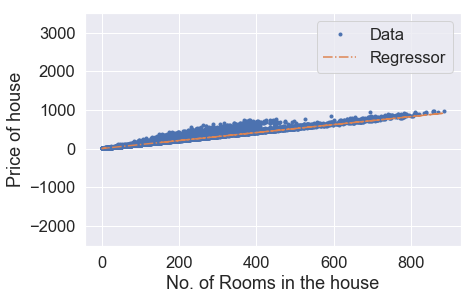

Iteration: 51,Cost = 1190.6861365964005,theta = [0.00385914 1.09632929]
Iteration: 51,Cost_val = 1209.9286178001682,theta = [0.00385914 1.09632929]


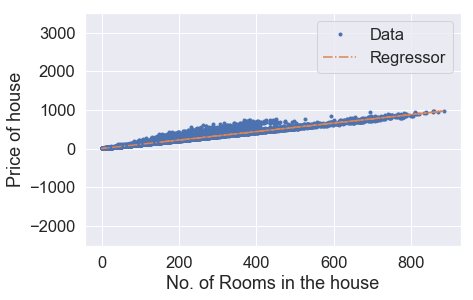

Iteration: 61,Cost = 1037.766457232216,theta = [0.00403949 1.1355296 ]
Iteration: 61,Cost_val = 1051.7567827266662,theta = [0.00403949 1.1355296 ]


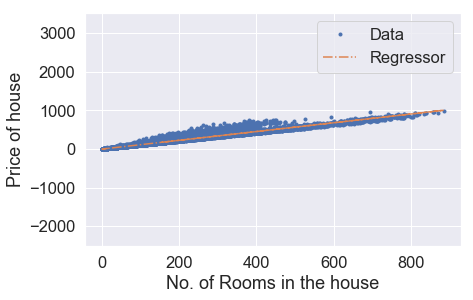

Iteration: 71,Cost = 979.4823035040392,theta = [0.00417066 1.15973049]
Iteration: 71,Cost_val = 989.9314919323458,theta = [0.00417066 1.15973049]


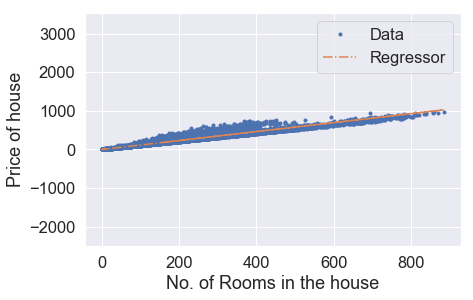

Iteration: 81,Cost = 957.2676460418833,theta = [0.00427146 1.17467123]
Iteration: 81,Cost_val = 965.4168361093924,theta = [0.00427146 1.17467123]


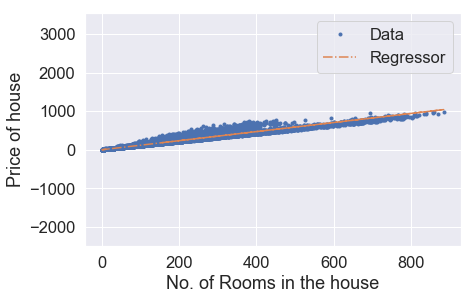

Iteration: 91,Cost = 948.8005590849549,theta = [0.00435352 1.18389508]
Iteration: 91,Cost_val = 955.4864277886835,theta = [0.00435352 1.18389508]


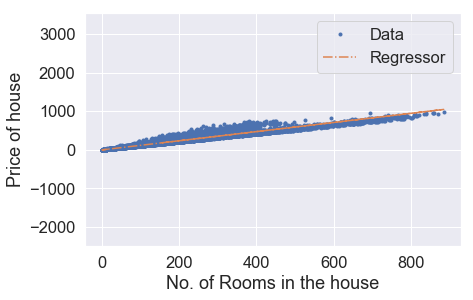

theta0 = 100
theta1 = 100
Costs = 100


In [ ]:

  
costs_val,costs_train,theta,iteration  = gradientDescentLinearRegression(alpha=1e-6,iter=100)


In [ ]:
'''prepare the test data'''

predictor_test = df_test["registered"]
x_test = np.column_stack((np.ones(len(predictor_test)),predictor_test))
Y_test = df_test["cnt"]  

In [ ]:
'''Calculate the loss for test data'''
J_test = calculateCost(x_test,theta,Y_test)
print(f"Cost_test = {J_test}")

Cost_test = 871.2733055884173


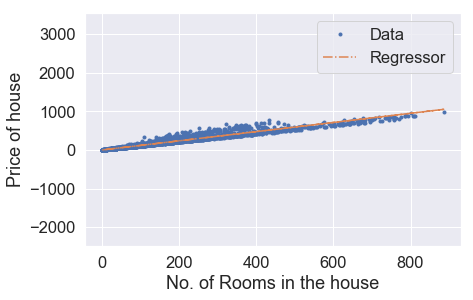

In [ ]:
'''plot the test data'''
abline(x_test,theta,Y_test)

In [ ]:
''' create range of iteration'''
iteration_range=list(range(0, iteration))

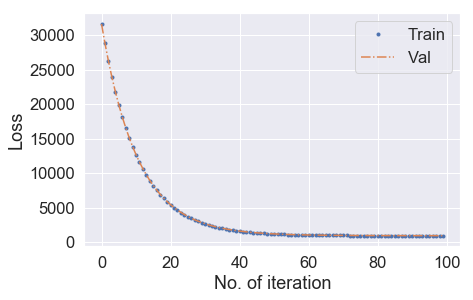

In [ ]:
'''plot loss'''
loss_plot(iteration_range,costs_train,costs_val)

Iteration: 1,Cost = 944.1983764939171,theta = [0.00448403 1.19367529]
Iteration: 1,Cost_val = 949.2964664966134,theta = [0.00448403 1.19367529]


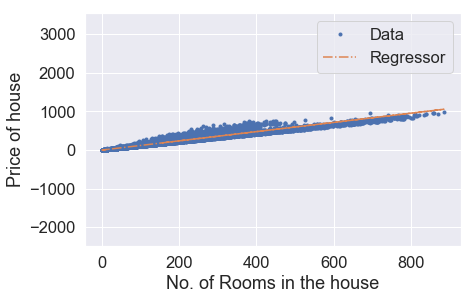

Iteration: 11,Cost = 943.5828443258627,theta = [0.0050188  1.19876692]
Iteration: 11,Cost_val = 947.8393785587335,theta = [0.0050188  1.19876692]


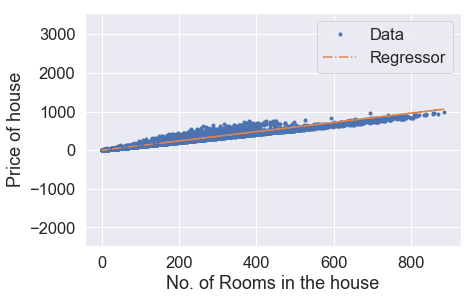

Iteration: 21,Cost = 943.580158726267,theta = [0.00553688 1.19877399]
Iteration: 21,Cost_val = 947.8352823482535,theta = [0.00553688 1.19877399]


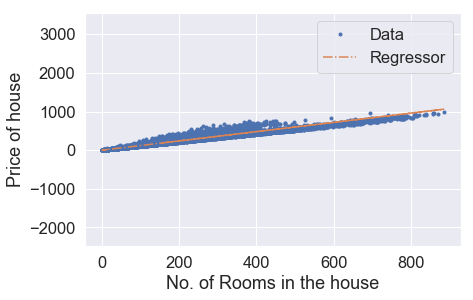

Iteration: 31,Cost = 943.5774752071014,theta = [0.00605491 1.19877231]
Iteration: 31,Cost_val = 947.8326429000826,theta = [0.00605491 1.19877231]


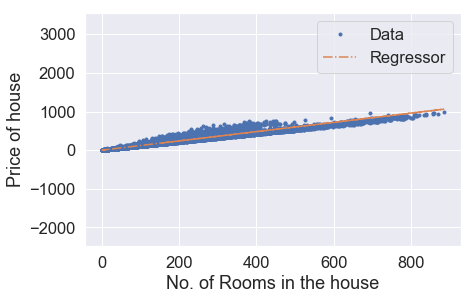

Iteration: 41,Cost = 943.5747919529167,theta = [0.00657291 1.19877061]
Iteration: 41,Cost_val = 947.8300062155548,theta = [0.00657291 1.19877061]


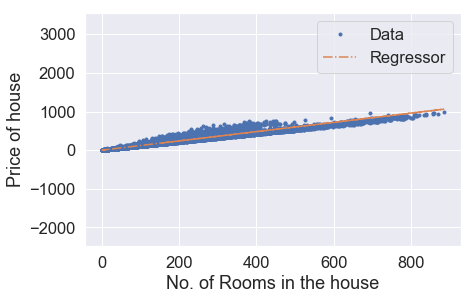

Iteration: 51,Cost = 943.5721089636895,theta = [0.00709088 1.19876891]
Iteration: 51,Cost_val = 947.8273697952372,theta = [0.00709088 1.19876891]


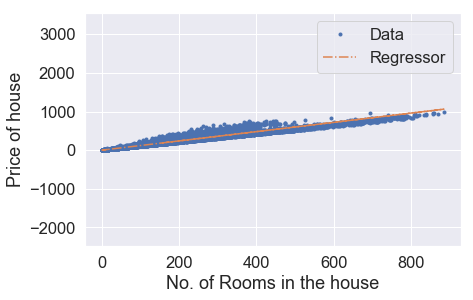

Iteration: 61,Cost = 943.5694262394012,theta = [0.00760883 1.19876721]
Iteration: 61,Cost_val = 947.8247336348111,theta = [0.00760883 1.19876721]


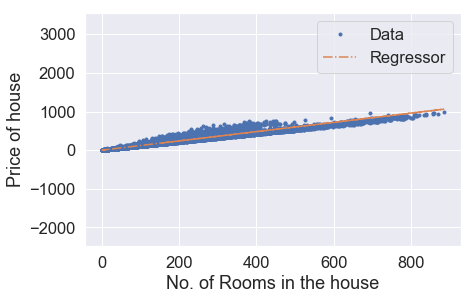

Iteration: 71,Cost = 943.5667437800263,theta = [0.00812675 1.19876551]
Iteration: 71,Cost_val = 947.8220977342376,theta = [0.00812675 1.19876551]


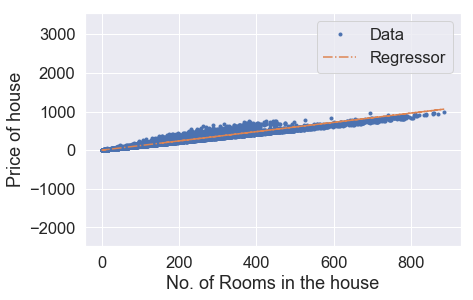

Iteration: 81,Cost = 943.5640615855239,theta = [0.00864465 1.19876381]
Iteration: 81,Cost_val = 947.8194620934962,theta = [0.00864465 1.19876381]


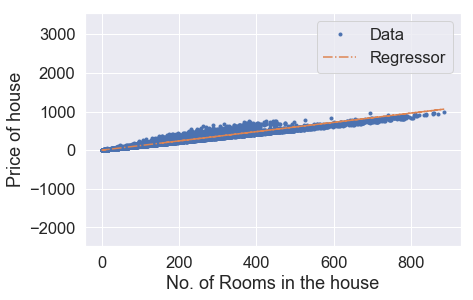

Iteration: 91,Cost = 943.5613796558774,theta = [0.00916252 1.19876212]
Iteration: 91,Cost_val = 947.8168267125566,theta = [0.00916252 1.19876212]


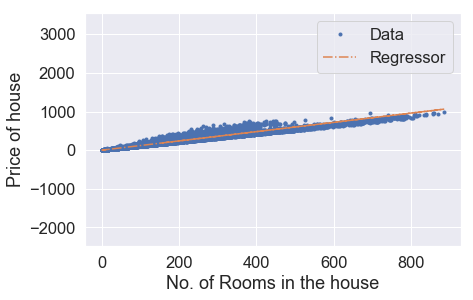

Iteration: 101,Cost = 943.5586979910603,theta = [0.00968036 1.19876042]
Iteration: 101,Cost_val = 947.8141915913982,theta = [0.00968036 1.19876042]


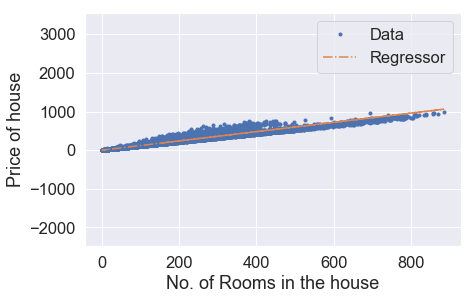

Iteration: 111,Cost = 943.5560165910509,theta = [0.01019818 1.19875872]
Iteration: 111,Cost_val = 947.8115567299906,theta = [0.01019818 1.19875872]


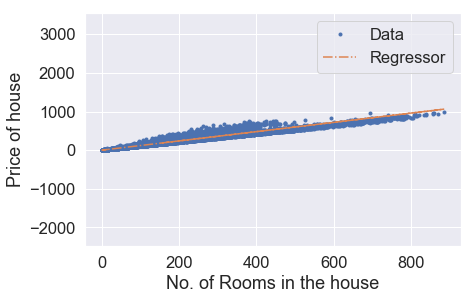

Iteration: 121,Cost = 943.5533354558154,theta = [0.01071598 1.19875702]
Iteration: 121,Cost_val = 947.8089221283088,theta = [0.01071598 1.19875702]


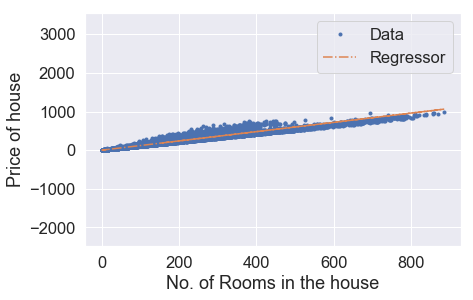

Iteration: 131,Cost = 943.5506545853324,theta = [0.01123375 1.19875532]
Iteration: 131,Cost_val = 947.8062877863306,theta = [0.01123375 1.19875532]


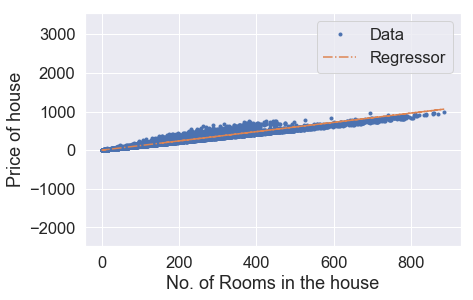

Iteration: 141,Cost = 943.5479739795752,theta = [0.01175149 1.19875363]
Iteration: 141,Cost_val = 947.8036537040256,theta = [0.01175149 1.19875363]


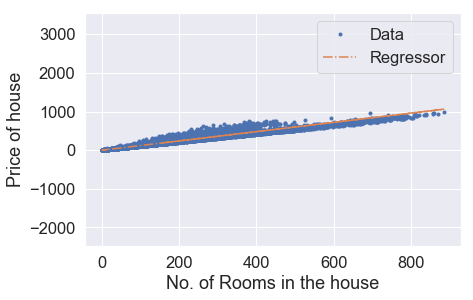

Iteration: 151,Cost = 943.5452936385035,theta = [0.01226921 1.19875193]
Iteration: 151,Cost_val = 947.8010198813699,theta = [0.01226921 1.19875193]


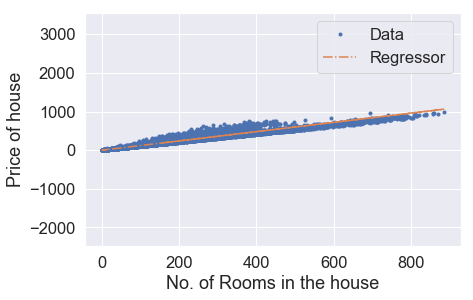

Iteration: 161,Cost = 943.5426135621171,theta = [0.0127869  1.19875023]
Iteration: 161,Cost_val = 947.7983863183456,theta = [0.0127869  1.19875023]


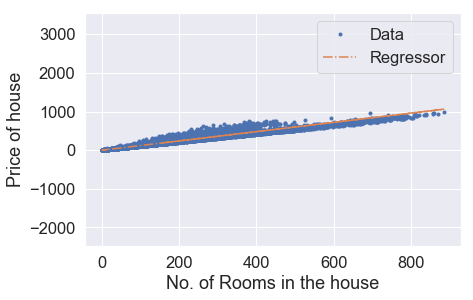

Iteration: 171,Cost = 943.5399337503716,theta = [0.01330457 1.19874853]
Iteration: 171,Cost_val = 947.7957530149151,theta = [0.01330457 1.19874853]


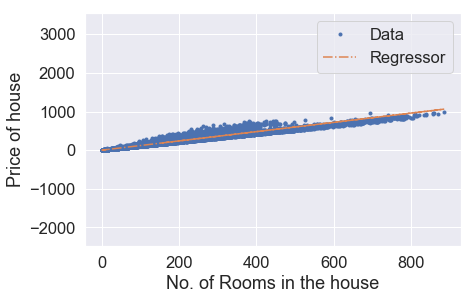

Iteration: 181,Cost = 943.5372542032416,theta = [0.01382221 1.19874684]
Iteration: 181,Cost_val = 947.7931199710575,theta = [0.01382221 1.19874684]


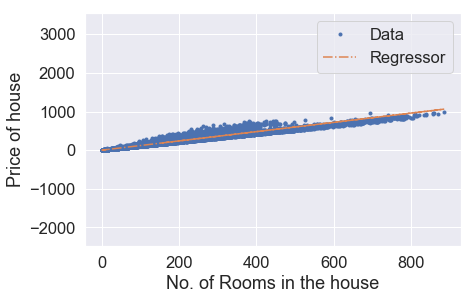

Iteration: 191,Cost = 943.5345749207166,theta = [0.01433983 1.19874514]
Iteration: 191,Cost_val = 947.790487186748,theta = [0.01433983 1.19874514]


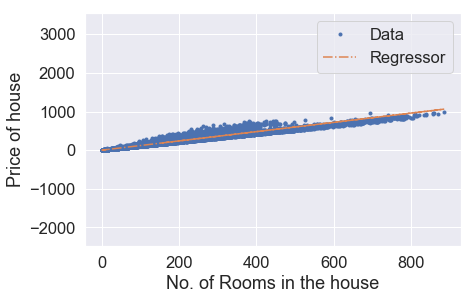

Iteration: 201,Cost = 943.5318959027519,theta = [0.01485742 1.19874344]
Iteration: 201,Cost_val = 947.7878546619647,theta = [0.01485742 1.19874344]


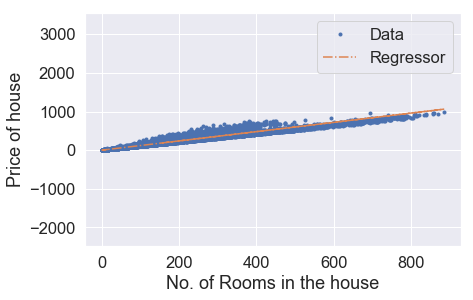

Iteration: 211,Cost = 943.5292171493352,theta = [0.01537498 1.19874174]
Iteration: 211,Cost_val = 947.7852223966735,theta = [0.01537498 1.19874174]


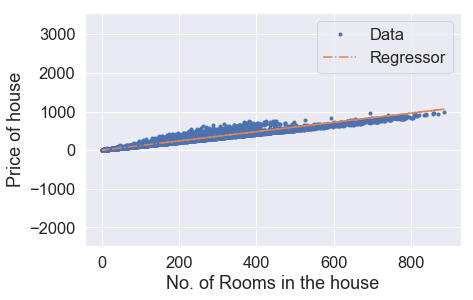

Iteration: 221,Cost = 943.5265386604142,theta = [0.01589252 1.19874005]
Iteration: 221,Cost_val = 947.7825903908548,theta = [0.01589252 1.19874005]


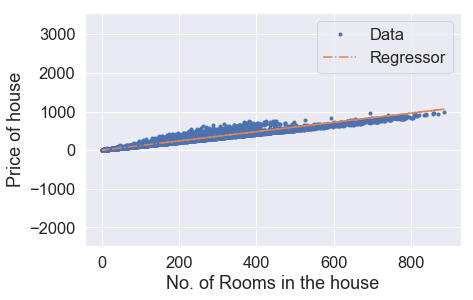

Iteration: 231,Cost = 943.5238604359973,theta = [0.01641003 1.19873835]
Iteration: 231,Cost_val = 947.7799586444825,theta = [0.01641003 1.19873835]


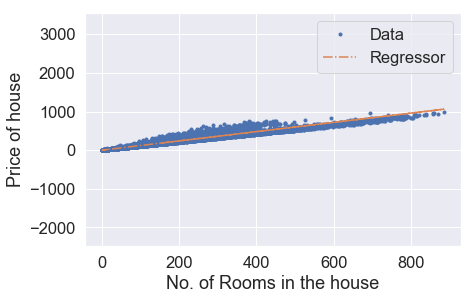

Iteration: 241,Cost = 943.5211824760487,theta = [0.01692752 1.19873665]
Iteration: 241,Cost_val = 947.7773271575269,theta = [0.01692752 1.19873665]


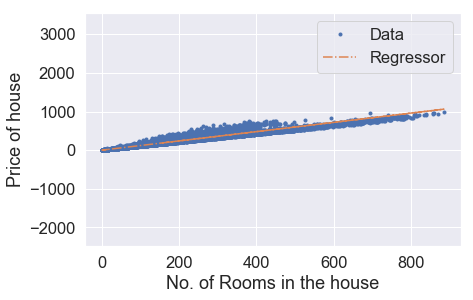

Iteration: 251,Cost = 943.5185047805298,theta = [0.01744498 1.19873496]
Iteration: 251,Cost_val = 947.7746959299668,theta = [0.01744498 1.19873496]


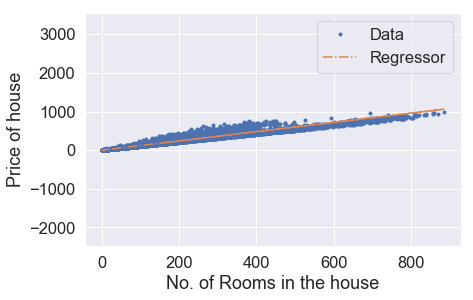

Iteration: 261,Cost = 943.5158273494221,theta = [0.01796242 1.19873326]
Iteration: 261,Cost_val = 947.7720649617734,theta = [0.01796242 1.19873326]


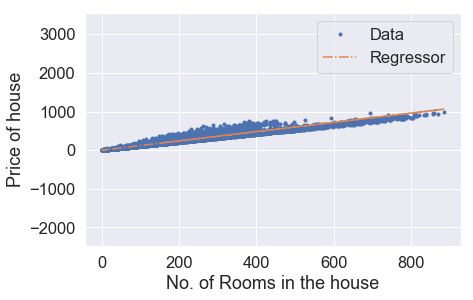

Iteration: 271,Cost = 943.5131501826945,theta = [0.01847983 1.19873156]
Iteration: 271,Cost_val = 947.7694342529319,theta = [0.01847983 1.19873156]


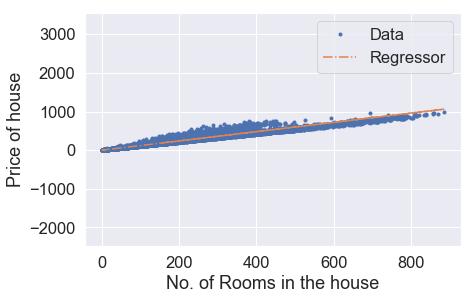

Iteration: 281,Cost = 943.5104732803356,theta = [0.01899722 1.19872987]
Iteration: 281,Cost_val = 947.7668038034009,theta = [0.01899722 1.19872987]


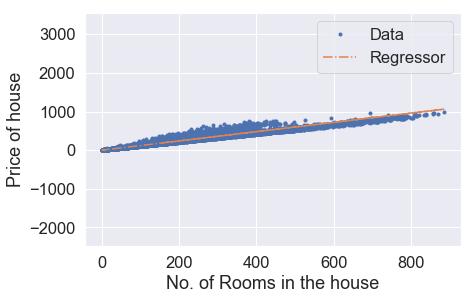

Iteration: 291,Cost = 943.507796642296,theta = [0.01951458 1.19872817]
Iteration: 291,Cost_val = 947.76417361316,theta = [0.01951458 1.19872817]


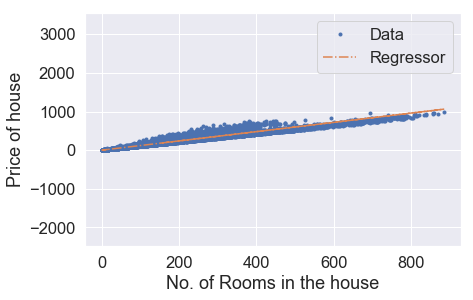

Iteration: 301,Cost = 943.5051202685737,theta = [0.02003191 1.19872647]
Iteration: 301,Cost_val = 947.7615436821864,theta = [0.02003191 1.19872647]


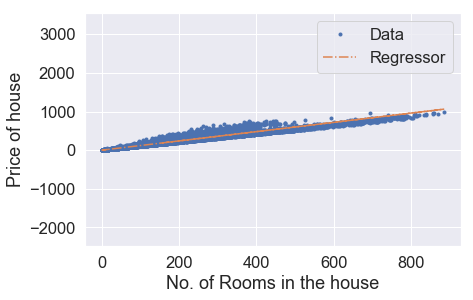

Iteration: 311,Cost = 943.5024441591265,theta = [0.02054922 1.19872478]
Iteration: 311,Cost_val = 947.7589140104541,theta = [0.02054922 1.19872478]


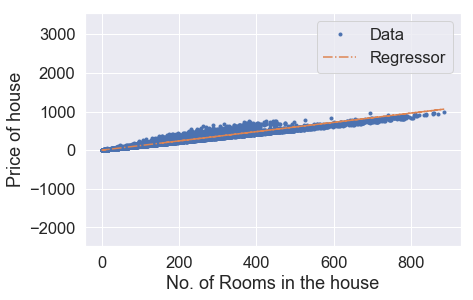

Iteration: 321,Cost = 943.4997683139322,theta = [0.02106651 1.19872308]
Iteration: 321,Cost_val = 947.7562845979414,theta = [0.02106651 1.19872308]


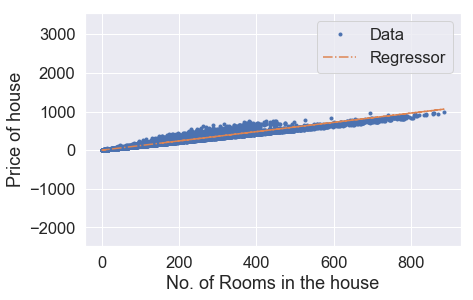

Iteration: 331,Cost = 943.4970927329823,theta = [0.02158376 1.19872139]
Iteration: 331,Cost_val = 947.7536554446135,theta = [0.02158376 1.19872139]


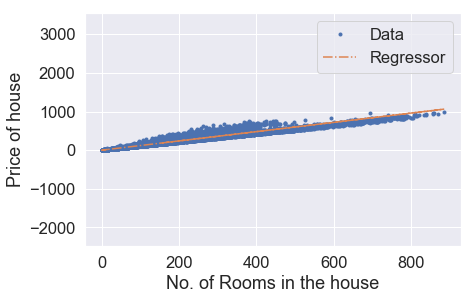

Iteration: 341,Cost = 943.4944174162204,theta = [0.022101   1.19871969]
Iteration: 341,Cost_val = 947.7510265504468,theta = [0.022101   1.19871969]


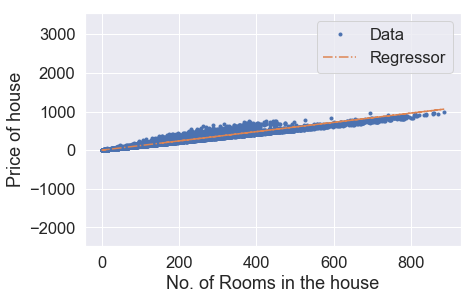

Iteration: 351,Cost = 943.4917423636278,theta = [0.0226182  1.19871799]
Iteration: 351,Cost_val = 947.7483979154255,theta = [0.0226182  1.19871799]


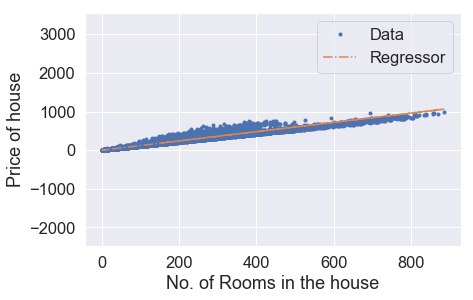

Iteration: 361,Cost = 943.4890675751997,theta = [0.02313538 1.1987163 ]
Iteration: 361,Cost_val = 947.7457695395109,theta = [0.02313538 1.1987163 ]


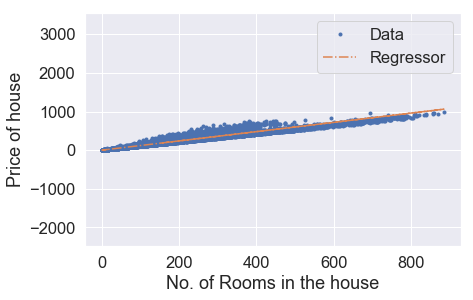

Iteration: 371,Cost = 943.4863930508726,theta = [0.02365254 1.1987146 ]
Iteration: 371,Cost_val = 947.7431414226863,theta = [0.02365254 1.1987146 ]


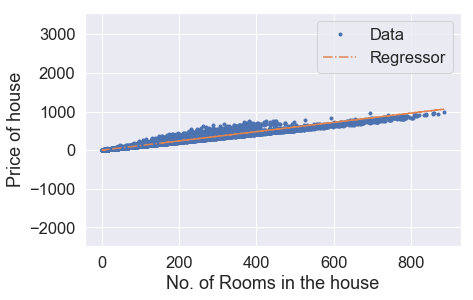

Iteration: 381,Cost = 943.4837187906722,theta = [0.02416967 1.19871291]
Iteration: 381,Cost_val = 947.7405135649235,theta = [0.02416967 1.19871291]


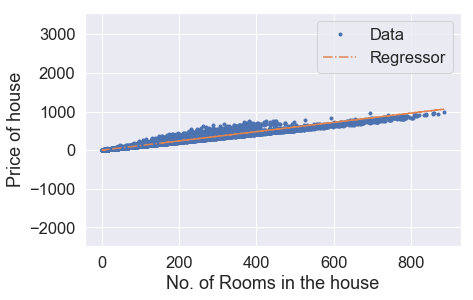

Iteration: 391,Cost = 943.481044794528,theta = [0.02468678 1.19871121]
Iteration: 391,Cost_val = 947.7378859661945,theta = [0.02468678 1.19871121]


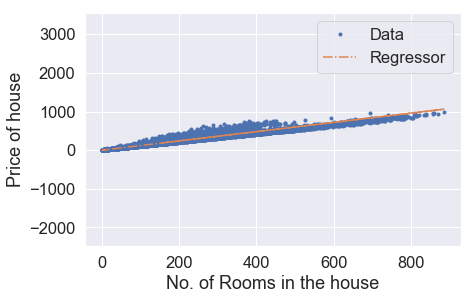

Iteration: 401,Cost = 943.4783710624322,theta = [0.02520385 1.19870952]
Iteration: 401,Cost_val = 947.735258626478,theta = [0.02520385 1.19870952]


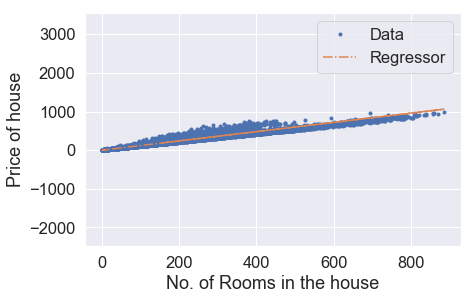

Iteration: 411,Cost = 943.4756975943586,theta = [0.02572091 1.19870782]
Iteration: 411,Cost_val = 947.7326315457456,theta = [0.02572091 1.19870782]


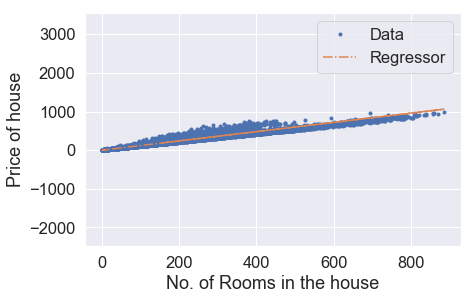

Iteration: 421,Cost = 943.47302439027,theta = [0.02623794 1.19870612]
Iteration: 421,Cost_val = 947.7300047239728,theta = [0.02623794 1.19870612]


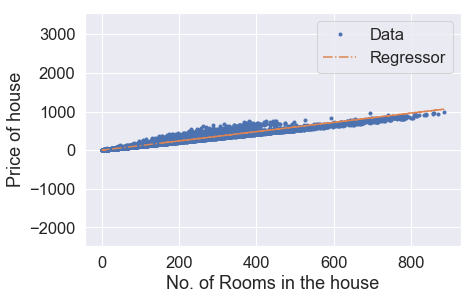

Iteration: 431,Cost = 943.4703514501548,theta = [0.02675494 1.19870443]
Iteration: 431,Cost_val = 947.727378161136,theta = [0.02675494 1.19870443]


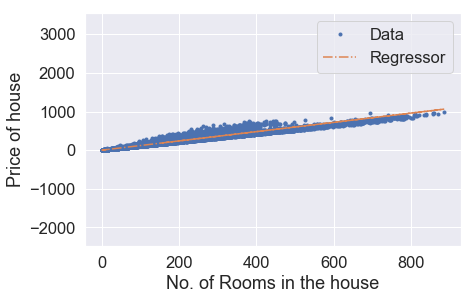

Iteration: 441,Cost = 943.4676787739816,theta = [0.02727192 1.19870273]
Iteration: 441,Cost_val = 947.7247518572083,theta = [0.02727192 1.19870273]


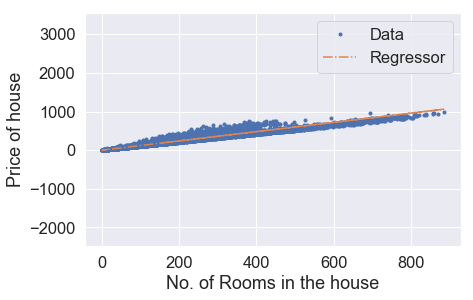

Iteration: 451,Cost = 943.4650063617131,theta = [0.02778887 1.19870104]
Iteration: 451,Cost_val = 947.7221258121585,theta = [0.02778887 1.19870104]


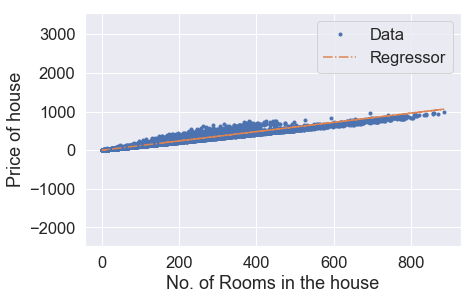

Iteration: 461,Cost = 943.4623342133525,theta = [0.02830579 1.19869934]
Iteration: 461,Cost_val = 947.7195000259676,theta = [0.02830579 1.19869934]


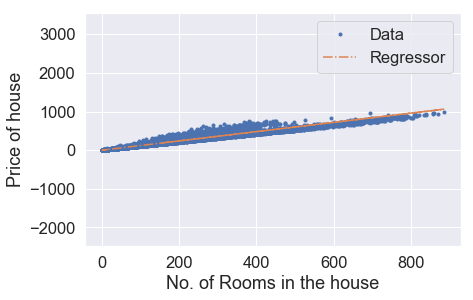

Iteration: 471,Cost = 943.4596623288373,theta = [0.02882269 1.19869765]
Iteration: 471,Cost_val = 947.7168744986101,theta = [0.02882269 1.19869765]


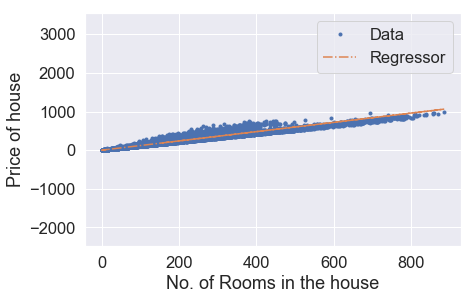

Iteration: 481,Cost = 943.4569907081648,theta = [0.02933957 1.19869595]
Iteration: 481,Cost_val = 947.7142492300591,theta = [0.02933957 1.19869595]


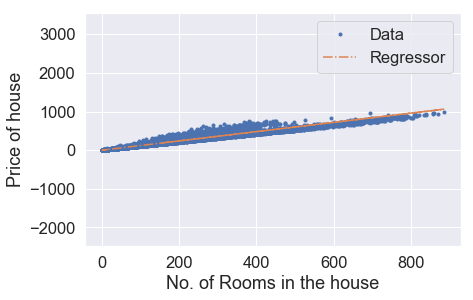

Iteration: 491,Cost = 943.4543193513116,theta = [0.02985642 1.19869426]
Iteration: 491,Cost_val = 947.7116242202842,theta = [0.02985642 1.19869426]


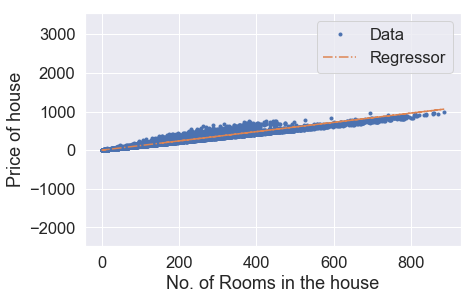

Iteration: 501,Cost = 943.451648258236,theta = [0.03037324 1.19869256]
Iteration: 501,Cost_val = 947.7089994692666,theta = [0.03037324 1.19869256]


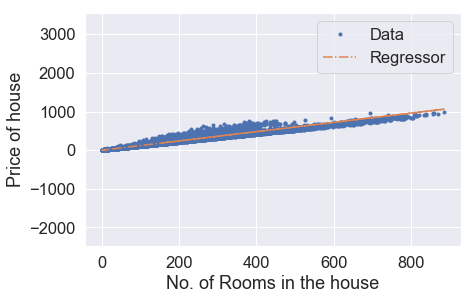

Iteration: 511,Cost = 943.4489774289183,theta = [0.03089004 1.19869087]
Iteration: 511,Cost_val = 947.706374976983,theta = [0.03089004 1.19869087]


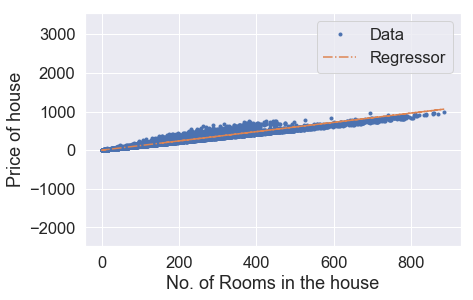

Iteration: 521,Cost = 943.4463068633331,theta = [0.03140681 1.19868918]
Iteration: 521,Cost_val = 947.7037507433989,theta = [0.03140681 1.19868918]


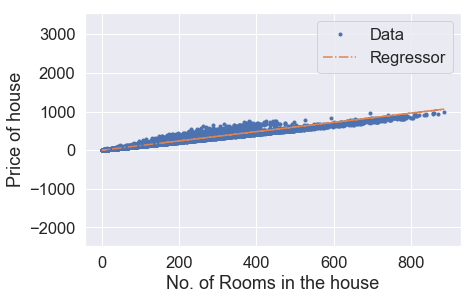

Iteration: 531,Cost = 943.4436365614611,theta = [0.03192356 1.19868748]
Iteration: 531,Cost_val = 947.7011267684991,theta = [0.03192356 1.19868748]


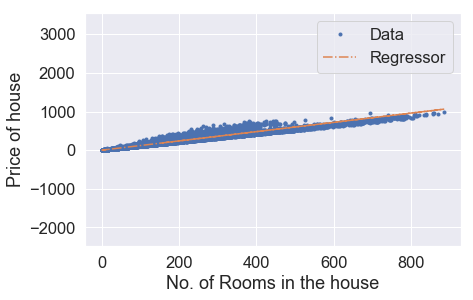

Iteration: 541,Cost = 943.4409665232546,theta = [0.03244028 1.19868579]
Iteration: 541,Cost_val = 947.6985030522453,theta = [0.03244028 1.19868579]


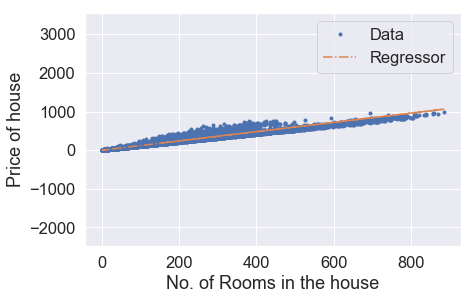

Iteration: 551,Cost = 943.4382967487182,theta = [0.03295698 1.19868409]
Iteration: 551,Cost_val = 947.6958795946233,theta = [0.03295698 1.19868409]


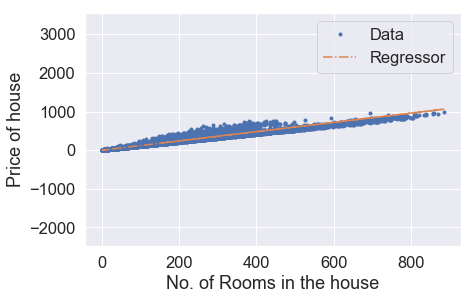

Iteration: 561,Cost = 943.4356272378042,theta = [0.03347365 1.1986824 ]
Iteration: 561,Cost_val = 947.693256395597,theta = [0.03347365 1.1986824 ]


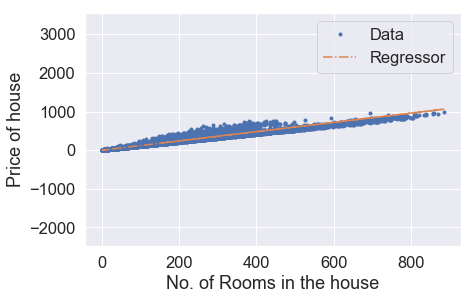

Iteration: 571,Cost = 943.4329579904929,theta = [0.0339903 1.1986807]
Iteration: 571,Cost_val = 947.6906334551553,theta = [0.0339903 1.1986807]


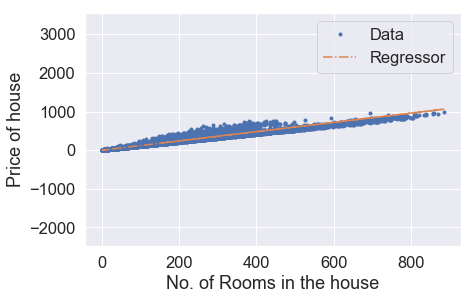

Iteration: 581,Cost = 943.4302890067639,theta = [0.03450692 1.19867901]
Iteration: 581,Cost_val = 947.68801077326,theta = [0.03450692 1.19867901]


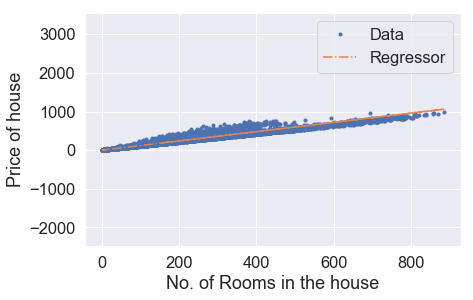

Iteration: 591,Cost = 943.427620286582,theta = [0.03502351 1.19867732]
Iteration: 591,Cost_val = 947.6853883498904,theta = [0.03502351 1.19867732]


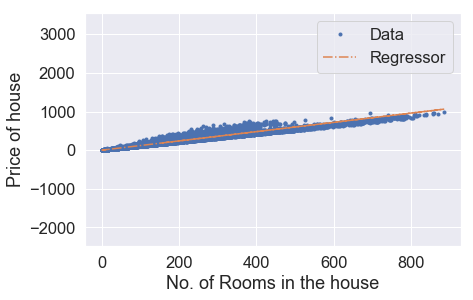

Iteration: 601,Cost = 943.4249518299232,theta = [0.03554008 1.19867562]
Iteration: 601,Cost_val = 947.6827661850228,theta = [0.03554008 1.19867562]


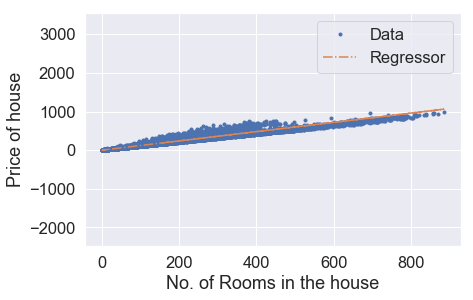

Iteration: 611,Cost = 943.422283636764,theta = [0.03605662 1.19867393]
Iteration: 611,Cost_val = 947.6801442786266,theta = [0.03605662 1.19867393]


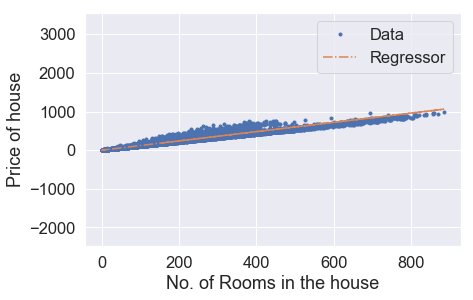

Iteration: 621,Cost = 943.4196157070663,theta = [0.03657314 1.19867223]
Iteration: 621,Cost_val = 947.6775226306814,theta = [0.03657314 1.19867223]


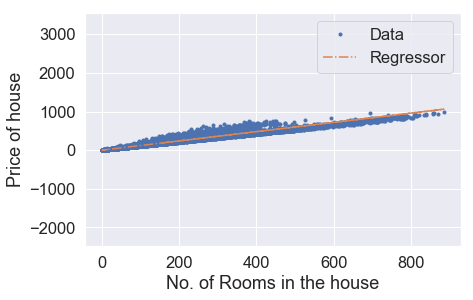

Iteration: 631,Cost = 943.416948040838,theta = [0.03708963 1.19867054]
Iteration: 631,Cost_val = 947.6749012411608,theta = [0.03708963 1.19867054]


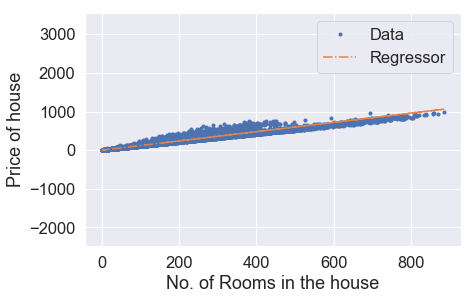

Iteration: 641,Cost = 943.4142806380149,theta = [0.0376061  1.19866885]
Iteration: 641,Cost_val = 947.6722801100374,theta = [0.0376061  1.19866885]


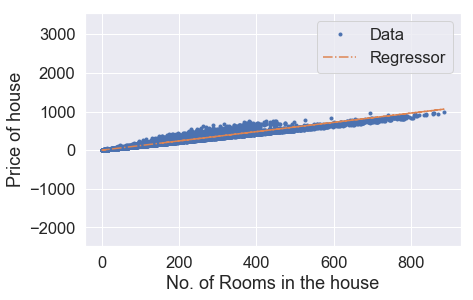

Iteration: 651,Cost = 943.411613498594,theta = [0.03812254 1.19866715]
Iteration: 651,Cost_val = 947.6696592372857,theta = [0.03812254 1.19866715]


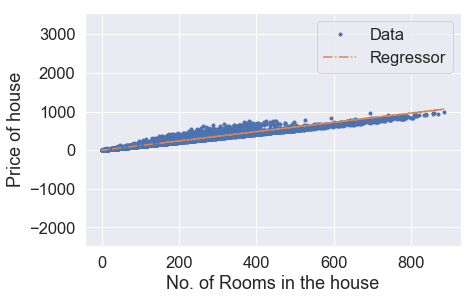

Iteration: 661,Cost = 943.4089466225367,theta = [0.03863896 1.19866546]
Iteration: 661,Cost_val = 947.667038622881,theta = [0.03863896 1.19866546]


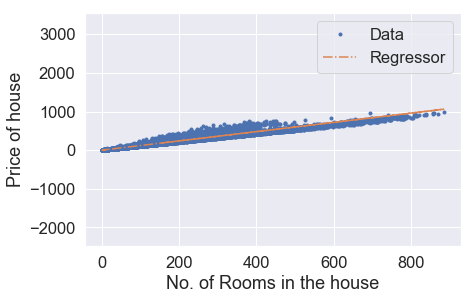

Iteration: 671,Cost = 943.4062800098145,theta = [0.03915535 1.19866377]
Iteration: 671,Cost_val = 947.6644182667937,theta = [0.03915535 1.19866377]


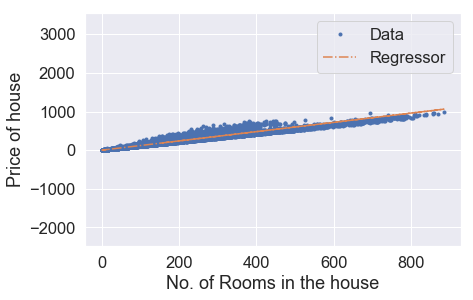

Iteration: 681,Cost = 943.4036136604085,theta = [0.03967171 1.19866207]
Iteration: 681,Cost_val = 947.6617981690084,theta = [0.03967171 1.19866207]


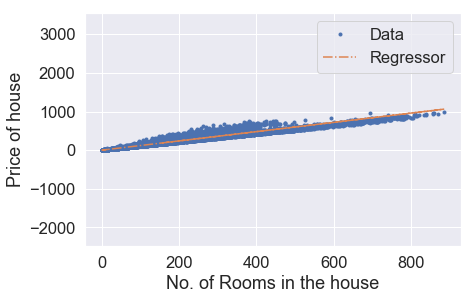

Iteration: 691,Cost = 943.400947574308,theta = [0.04018805 1.19866038]
Iteration: 691,Cost_val = 947.659178329493,theta = [0.04018805 1.19866038]


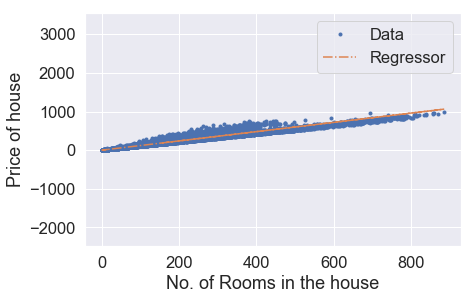

Iteration: 701,Cost = 943.3982817514591,theta = [0.04070437 1.19865869]
Iteration: 701,Cost_val = 947.6565587482221,theta = [0.04070437 1.19865869]


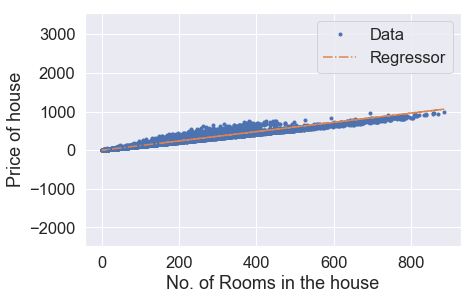

Iteration: 711,Cost = 943.3956161918525,theta = [0.04122066 1.198657  ]
Iteration: 711,Cost_val = 947.653939425168,theta = [0.04122066 1.198657  ]


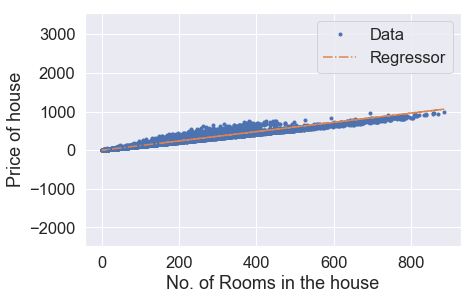

Iteration: 721,Cost = 943.3929508954621,theta = [0.04173692 1.1986553 ]
Iteration: 721,Cost_val = 947.6513203603116,theta = [0.04173692 1.1986553 ]


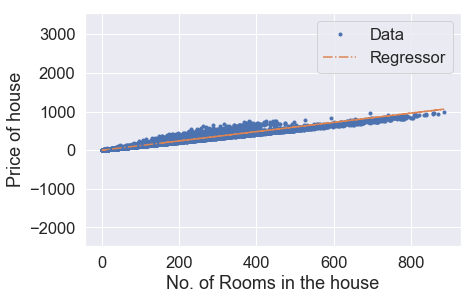

Iteration: 731,Cost = 943.3902858622632,theta = [0.04225316 1.19865361]
Iteration: 731,Cost_val = 947.6487015536183,theta = [0.04225316 1.19865361]


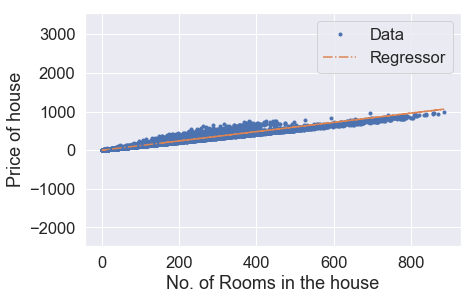

Iteration: 741,Cost = 943.3876210922072,theta = [0.04276937 1.19865192]
Iteration: 741,Cost_val = 947.6460830050762,theta = [0.04276937 1.19865192]


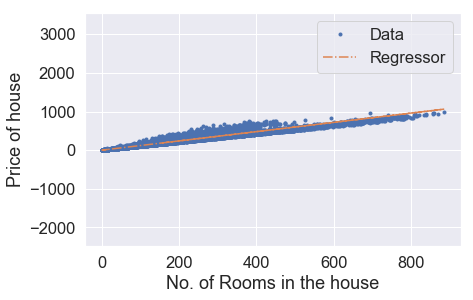

Iteration: 751,Cost = 943.3849565852918,theta = [0.04328555 1.19865022]
Iteration: 751,Cost_val = 947.6434647146472,theta = [0.04328555 1.19865022]


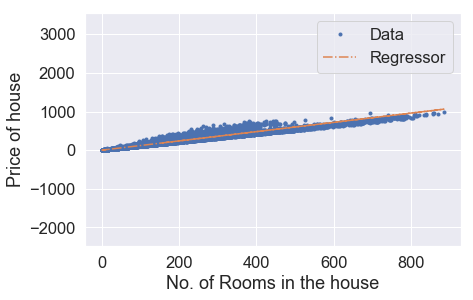

Iteration: 761,Cost = 943.382292341493,theta = [0.04380172 1.19864853]
Iteration: 761,Cost_val = 947.6408466823088,theta = [0.04380172 1.19864853]


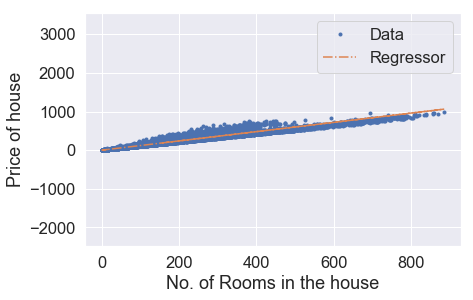

Iteration: 771,Cost = 943.3796283607677,theta = [0.04431785 1.19864684]
Iteration: 771,Cost_val = 947.6382289080365,theta = [0.04431785 1.19864684]


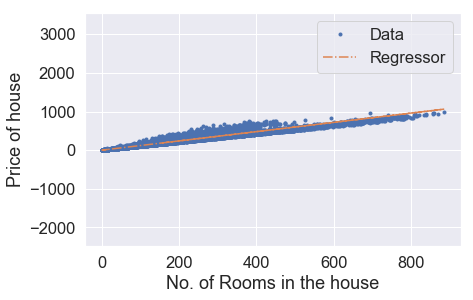

Iteration: 781,Cost = 943.3769646431109,theta = [0.04483396 1.19864515]
Iteration: 781,Cost_val = 947.6356113918076,theta = [0.04483396 1.19864515]


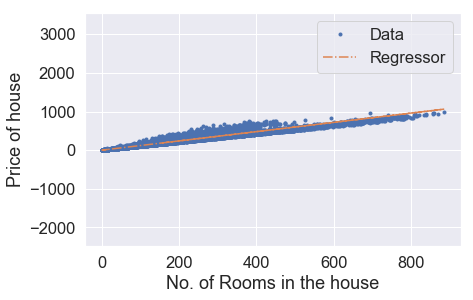

Iteration: 791,Cost = 943.3743011884764,theta = [0.04535005 1.19864346]
Iteration: 791,Cost_val = 947.6329941335974,theta = [0.04535005 1.19864346]


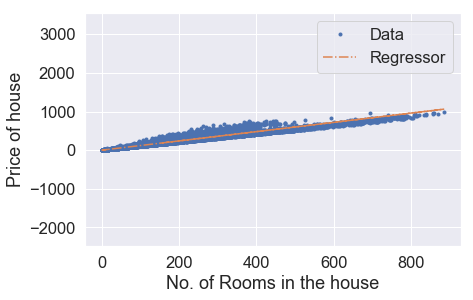

Iteration: 801,Cost = 943.3716379968512,theta = [0.0458661  1.19864176]
Iteration: 801,Cost_val = 947.630377133374,theta = [0.0458661  1.19864176]


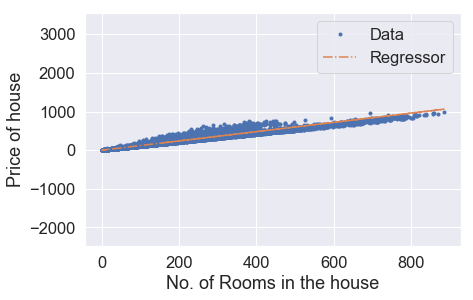

Iteration: 811,Cost = 943.3689750681987,theta = [0.04638214 1.19864007]
Iteration: 811,Cost_val = 947.6277603911161,theta = [0.04638214 1.19864007]


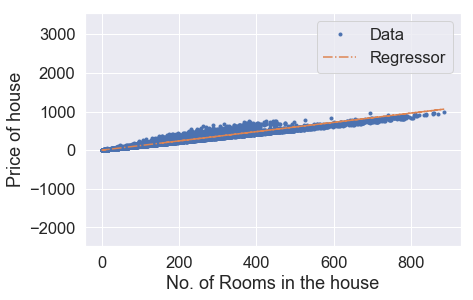

Iteration: 821,Cost = 943.3663124024998,theta = [0.04689815 1.19863838]
Iteration: 821,Cost_val = 947.6251439067986,theta = [0.04689815 1.19863838]


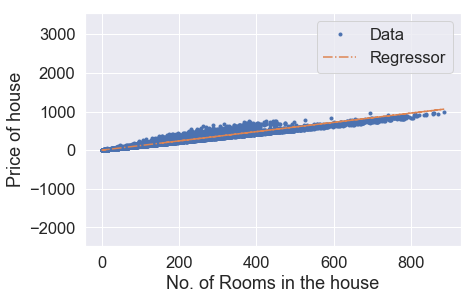

Iteration: 831,Cost = 943.3636499997239,theta = [0.04741413 1.19863669]
Iteration: 831,Cost_val = 947.6225276803945,theta = [0.04741413 1.19863669]


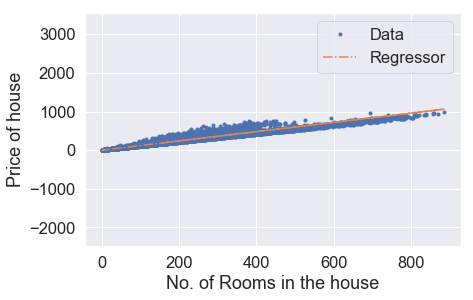

Iteration: 841,Cost = 943.3609878598588,theta = [0.04793009 1.198635  ]
Iteration: 841,Cost_val = 947.6199117118775,theta = [0.04793009 1.198635  ]


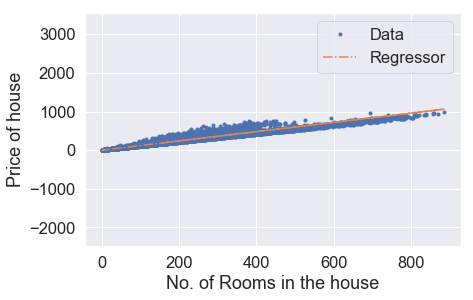

Iteration: 851,Cost = 943.3583259828673,theta = [0.04844602 1.1986333 ]
Iteration: 851,Cost_val = 947.617296001228,theta = [0.04844602 1.1986333 ]


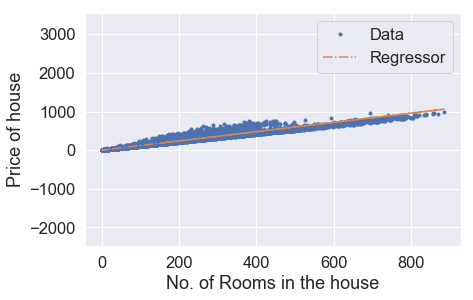

Iteration: 861,Cost = 943.3556643687072,theta = [0.04896192 1.19863161]
Iteration: 861,Cost_val = 947.6146805484103,theta = [0.04896192 1.19863161]


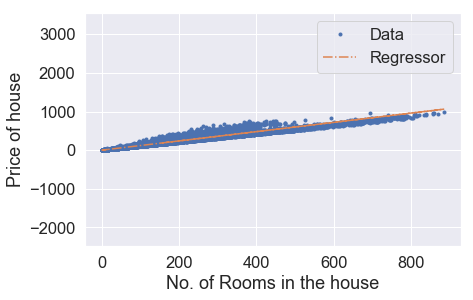

Iteration: 871,Cost = 943.3530030173922,theta = [0.0494778  1.19862992]
Iteration: 871,Cost_val = 947.6120653534127,theta = [0.0494778  1.19862992]


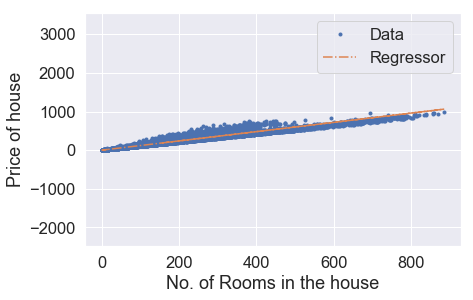

Iteration: 881,Cost = 943.3503419288629,theta = [0.04999366 1.19862823]
Iteration: 881,Cost_val = 947.6094504161946,theta = [0.04999366 1.19862823]


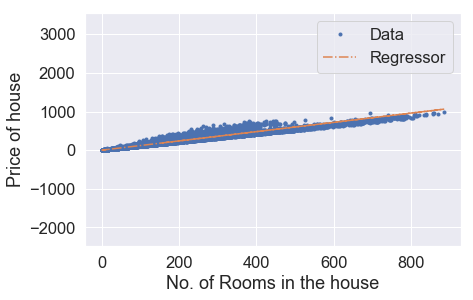

Iteration: 891,Cost = 943.3476811031092,theta = [0.05050949 1.19862654]
Iteration: 891,Cost_val = 947.6068357367395,theta = [0.05050949 1.19862654]


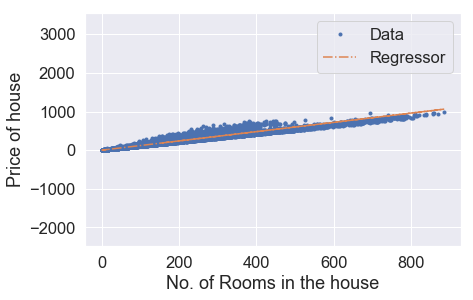

Iteration: 901,Cost = 943.3450205400944,theta = [0.05102529 1.19862485]
Iteration: 901,Cost_val = 947.604221315025,theta = [0.05102529 1.19862485]


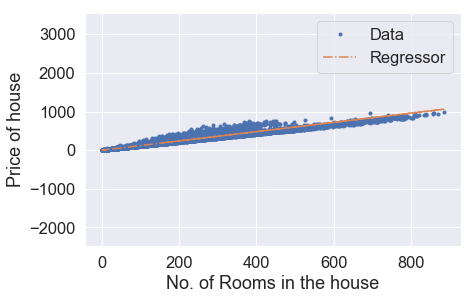

Iteration: 911,Cost = 943.3423602398054,theta = [0.05154107 1.19862315]
Iteration: 911,Cost_val = 947.6016071510164,theta = [0.05154107 1.19862315]


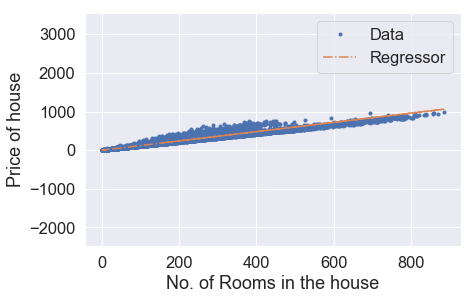

Iteration: 921,Cost = 943.3397002022041,theta = [0.05205683 1.19862146]
Iteration: 921,Cost_val = 947.5989932446911,theta = [0.05205683 1.19862146]


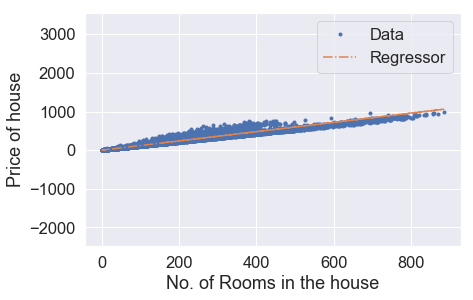

Iteration: 931,Cost = 943.3370404272762,theta = [0.05257255 1.19861977]
Iteration: 931,Cost_val = 947.5963795960299,theta = [0.05257255 1.19861977]


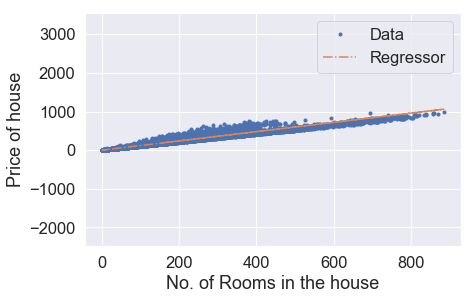

Iteration: 941,Cost = 943.3343809149751,theta = [0.05308826 1.19861808]
Iteration: 941,Cost_val = 947.593766204999,theta = [0.05308826 1.19861808]


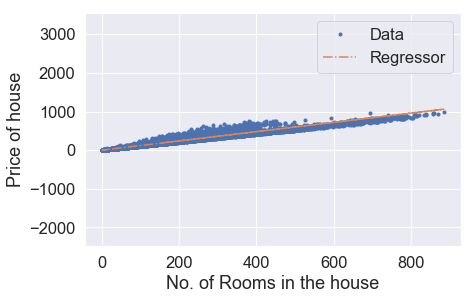

Iteration: 951,Cost = 943.3317216653026,theta = [0.05360393 1.19861639]
Iteration: 951,Cost_val = 947.5911530715817,theta = [0.05360393 1.19861639]


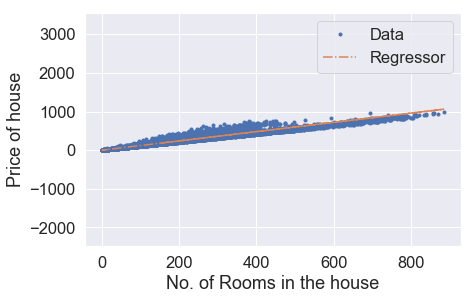

Iteration: 961,Cost = 943.32906267822,theta = [0.05411959 1.1986147 ]
Iteration: 961,Cost_val = 947.5885401957431,theta = [0.05411959 1.1986147 ]


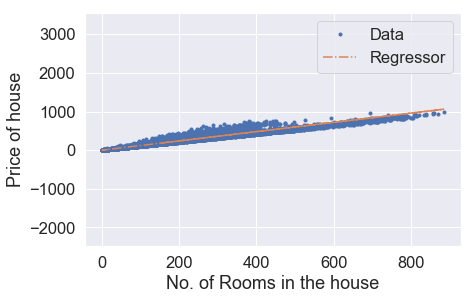

Iteration: 971,Cost = 943.3264039537014,theta = [0.05463521 1.19861301]
Iteration: 971,Cost_val = 947.5859275774633,theta = [0.05463521 1.19861301]


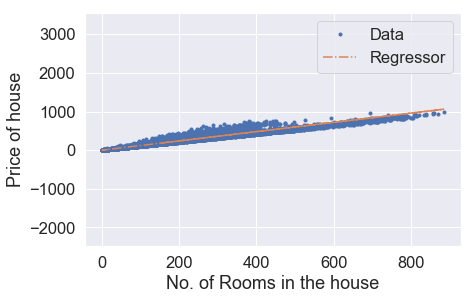

Iteration: 981,Cost = 943.3237454917172,theta = [0.05515081 1.19861132]
Iteration: 981,Cost_val = 947.583315216718,theta = [0.05515081 1.19861132]


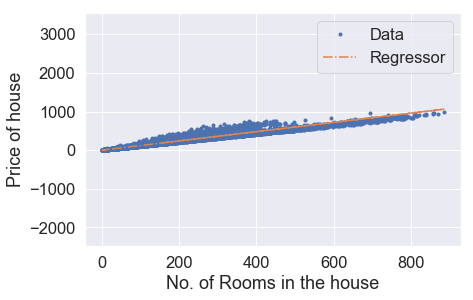

Iteration: 991,Cost = 943.321087292238,theta = [0.05566639 1.19860963]
Iteration: 991,Cost_val = 947.5807031134792,theta = [0.05566639 1.19860963]


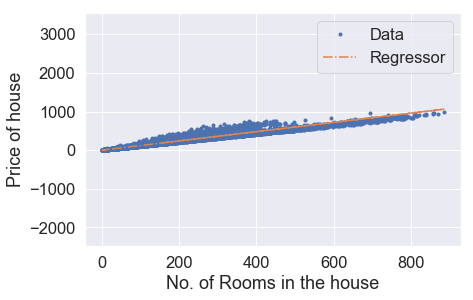

Iteration: 1001,Cost = 943.3184293552498,theta = [0.05618194 1.19860794]
Iteration: 1001,Cost_val = 947.5780912677247,theta = [0.05618194 1.19860794]


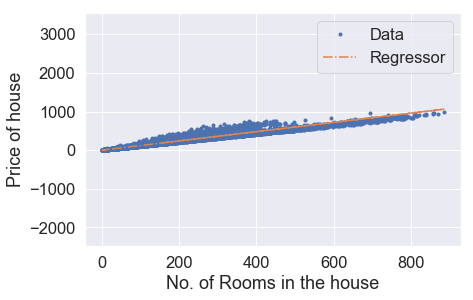

Iteration: 1011,Cost = 943.3157716807242,theta = [0.05669746 1.19860625]
Iteration: 1011,Cost_val = 947.5754796794255,theta = [0.05669746 1.19860625]


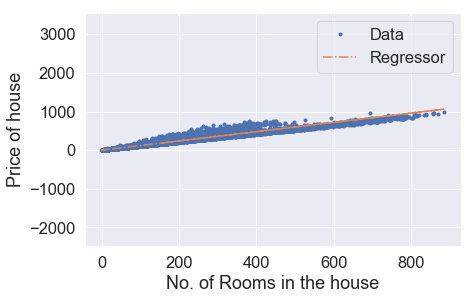

Iteration: 1021,Cost = 943.3131142686381,theta = [0.05721296 1.19860456]
Iteration: 1021,Cost_val = 947.5728683485512,theta = [0.05721296 1.19860456]


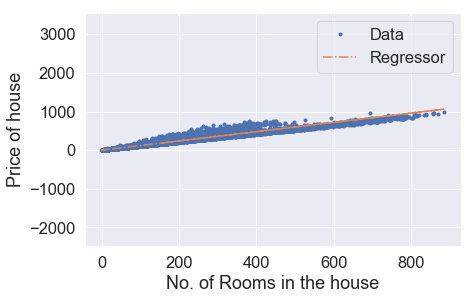

Iteration: 1031,Cost = 943.3104571189438,theta = [0.05772843 1.19860287]
Iteration: 1031,Cost_val = 947.5702572750885,theta = [0.05772843 1.19860287]


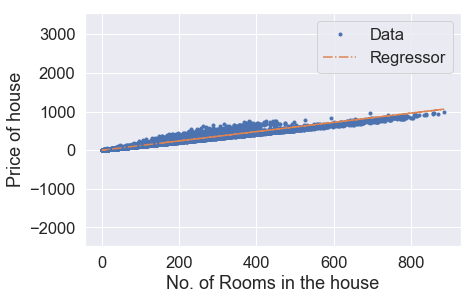

Iteration: 1041,Cost = 943.3078002316453,theta = [0.05824388 1.19860118]
Iteration: 1041,Cost_val = 947.5676464590042,theta = [0.05824388 1.19860118]


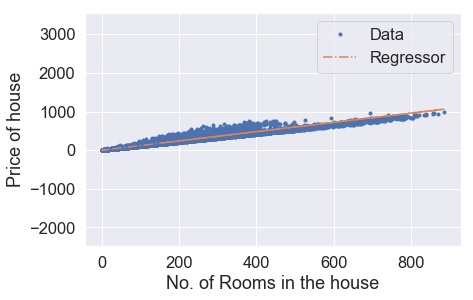

Iteration: 1051,Cost = 943.3051436066858,theta = [0.0587593  1.19859949]
Iteration: 1051,Cost_val = 947.5650359002714,theta = [0.0587593  1.19859949]


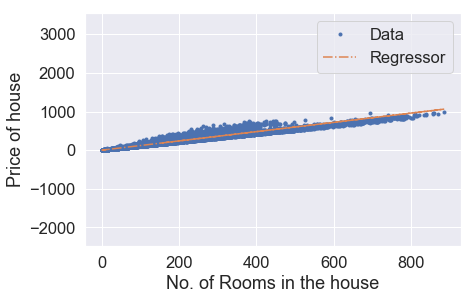

Iteration: 1061,Cost = 943.3024872440735,theta = [0.0592747 1.1985978]
Iteration: 1061,Cost_val = 947.5624255988736,theta = [0.0592747 1.1985978]


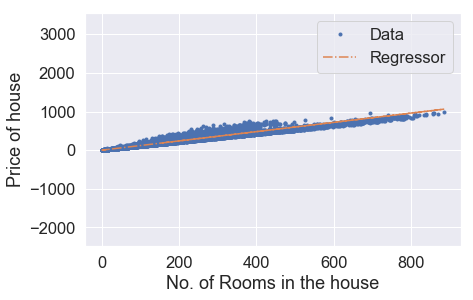

Iteration: 1071,Cost = 943.299831143768,theta = [0.05979007 1.19859611]
Iteration: 1071,Cost_val = 947.5598155547776,theta = [0.05979007 1.19859611]


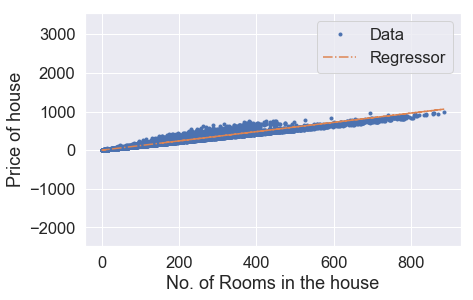

Iteration: 1081,Cost = 943.2971753057269,theta = [0.06030542 1.19859442]
Iteration: 1081,Cost_val = 947.5572057679628,theta = [0.06030542 1.19859442]


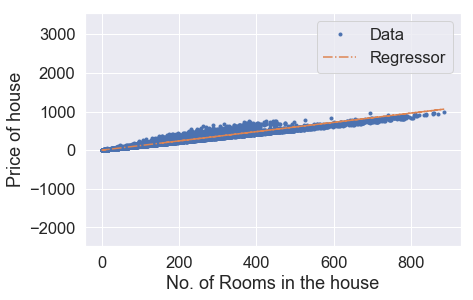

Iteration: 1091,Cost = 943.2945197299449,theta = [0.06082074 1.19859273]
Iteration: 1091,Cost_val = 947.554596238397,theta = [0.06082074 1.19859273]


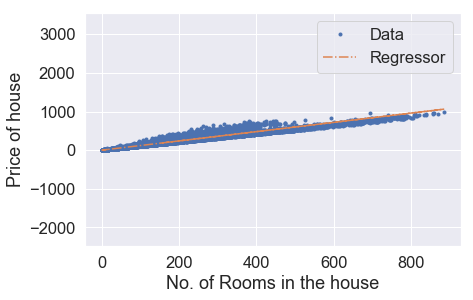

Iteration: 1101,Cost = 943.2918644163823,theta = [0.06133603 1.19859104]
Iteration: 1101,Cost_val = 947.5519869660593,theta = [0.06133603 1.19859104]


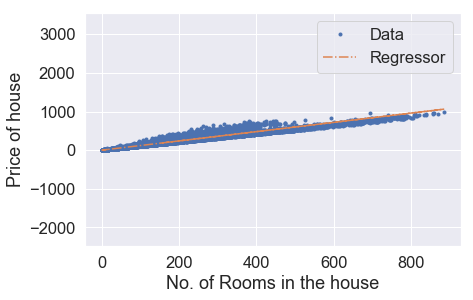

Iteration: 1111,Cost = 943.2892093650315,theta = [0.0618513  1.19858935]
Iteration: 1111,Cost_val = 947.5493779509281,theta = [0.0618513  1.19858935]


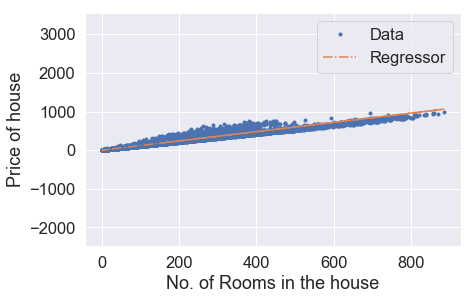

Iteration: 1121,Cost = 943.2865545758502,theta = [0.06236655 1.19858766]
Iteration: 1121,Cost_val = 947.5467691929697,theta = [0.06236655 1.19858766]


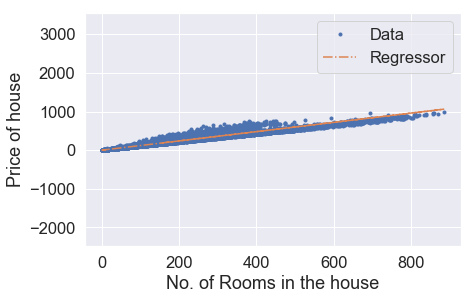

Iteration: 1131,Cost = 943.2839000488111,theta = [0.06288177 1.19858597]
Iteration: 1131,Cost_val = 947.5441606921643,theta = [0.06288177 1.19858597]


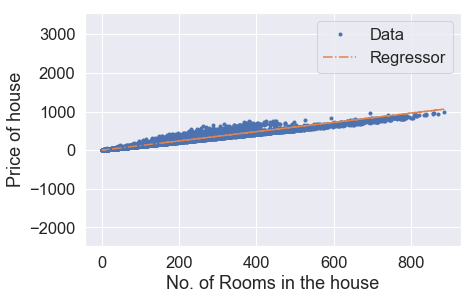

Iteration: 1141,Cost = 943.2812457839076,theta = [0.06339696 1.19858428]
Iteration: 1141,Cost_val = 947.54155244849,theta = [0.06339696 1.19858428]


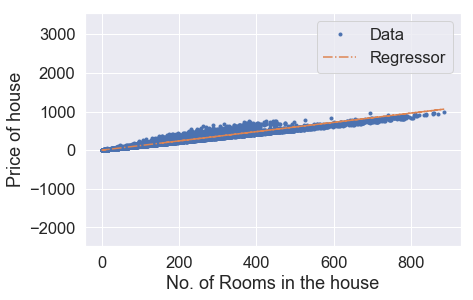

Iteration: 1151,Cost = 943.2785917810836,theta = [0.06391213 1.19858259]
Iteration: 1151,Cost_val = 947.5389444619095,theta = [0.06391213 1.19858259]


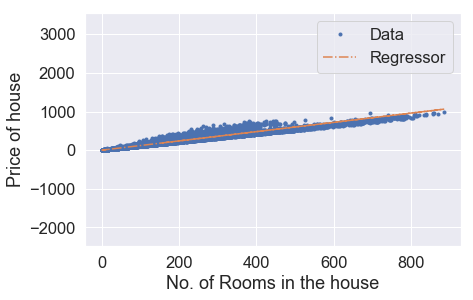

Iteration: 1161,Cost = 943.2759380403526,theta = [0.06442727 1.1985809 ]
Iteration: 1161,Cost_val = 947.5363367324107,theta = [0.06442727 1.1985809 ]


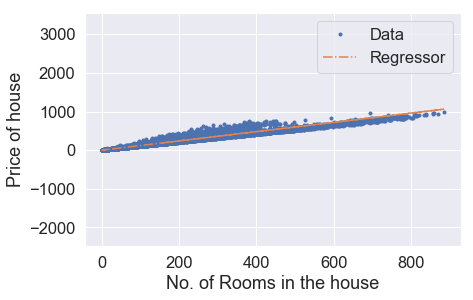

Iteration: 1171,Cost = 943.2732845616596,theta = [0.06494239 1.19857921]
Iteration: 1171,Cost_val = 947.5337292599563,theta = [0.06494239 1.19857921]


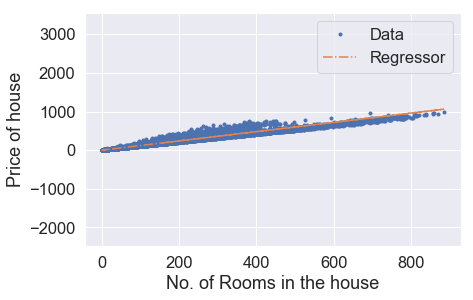

Iteration: 1181,Cost = 943.2706313449798,theta = [0.06545748 1.19857752]
Iteration: 1181,Cost_val = 947.5311220445305,theta = [0.06545748 1.19857752]


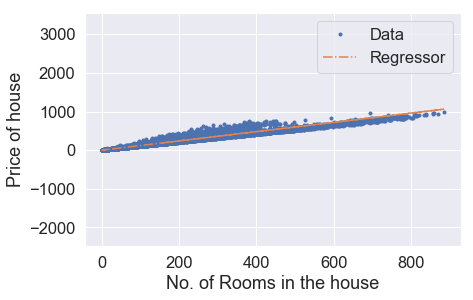

Iteration: 1191,Cost = 943.2679783903019,theta = [0.06597255 1.19857583]
Iteration: 1191,Cost_val = 947.5285150861039,theta = [0.06597255 1.19857583]


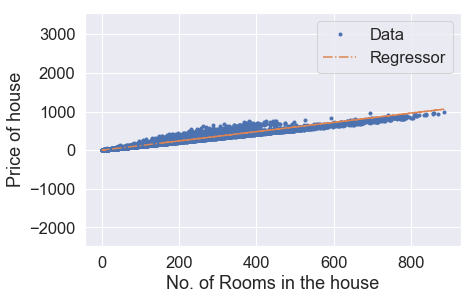

Iteration: 1201,Cost = 943.2653256975814,theta = [0.06648759 1.19857414]
Iteration: 1201,Cost_val = 947.5259083846478,theta = [0.06648759 1.19857414]


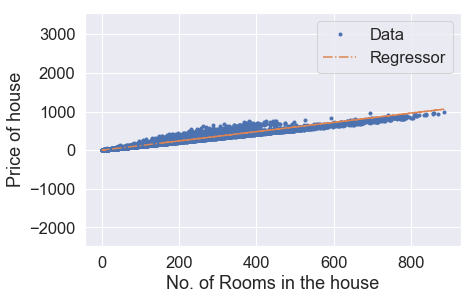

Iteration: 1211,Cost = 943.2626732668114,theta = [0.0670026  1.19857246]
Iteration: 1211,Cost_val = 947.5233019401436,theta = [0.0670026  1.19857246]


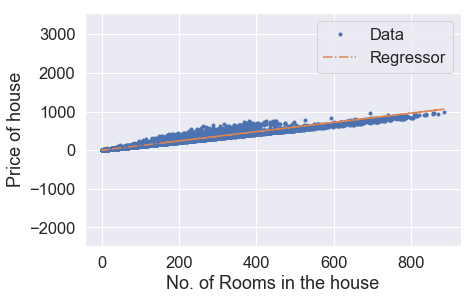

Iteration: 1221,Cost = 943.2600210979567,theta = [0.06751759 1.19857077]
Iteration: 1221,Cost_val = 947.5206957525684,theta = [0.06751759 1.19857077]


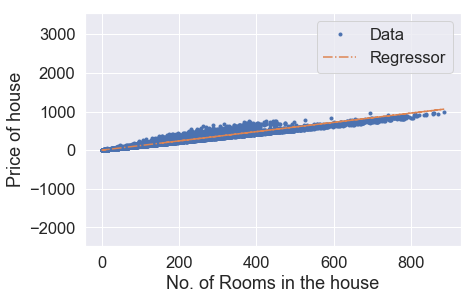

Iteration: 1231,Cost = 943.2573691909809,theta = [0.06803256 1.19856908]
Iteration: 1231,Cost_val = 947.5180898218838,theta = [0.06803256 1.19856908]


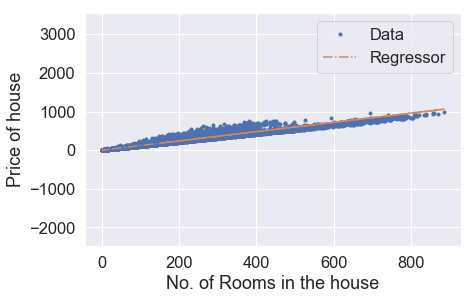

Iteration: 1241,Cost = 943.2547175458819,theta = [0.0685475  1.19856739]
Iteration: 1241,Cost_val = 947.5154841480716,theta = [0.0685475  1.19856739]


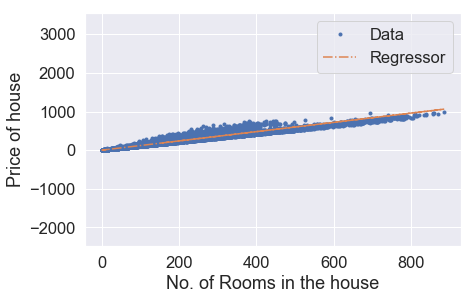

Iteration: 1251,Cost = 943.2520661626302,theta = [0.06906241 1.1985657 ]
Iteration: 1251,Cost_val = 947.5128787311119,theta = [0.06906241 1.1985657 ]


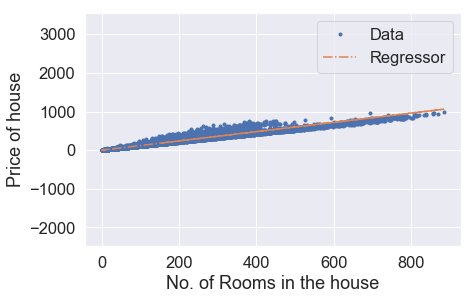

Iteration: 1261,Cost = 943.2494150411708,theta = [0.0695773  1.19856401]
Iteration: 1261,Cost_val = 947.5102735709717,theta = [0.0695773  1.19856401]


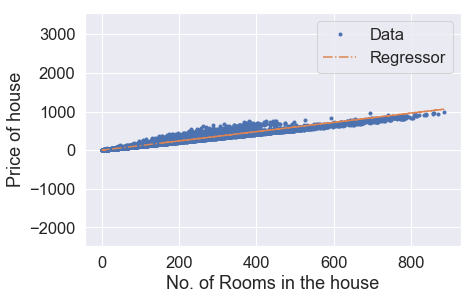

In [ ]:
'''use the saved weight'''
costs_val,costs_train,theta,iteration  = gradientDescentLinearRegression(alpha=1e-5,iter=10000, theta=theta)

In [ ]:
'''Calculate the loss for test data'''
J_test = calculateCost(x_test,theta,Y_test)
print(f"Cost_test = {J_test}")

In [ ]:
'''plot the test data'''
abline(x_test,theta,Y_test)

In [ ]:
''' create range of iteration'''
iteration_range=list(range(0, iteration))

In [ ]:
'''plot loss'''
loss_plot(iteration_range,costs_train,costs_val)